## REGRESSION
Also under supervised learning, regression deals with continuous values such as cost of housing, stock prices. Data values are thus usually continuous, thus target variable is quantitative.

We will work on the 'gapminder.csv' file with the objective of predicting life expectance in a given country based on certain given features.


### IMPORTATION OF MODULES AND DATA

In [2]:
#Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
#Reading CSV file into a dataframe 'df'
df = pd.read_csv('gapminder.csv')

In [4]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### PREPROCESSING

In [5]:
df.drop(labels=['Region'], axis='columns', inplace=True)
df.head()


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [6]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)


# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### VISUALIZATION AND DESCRIPTION

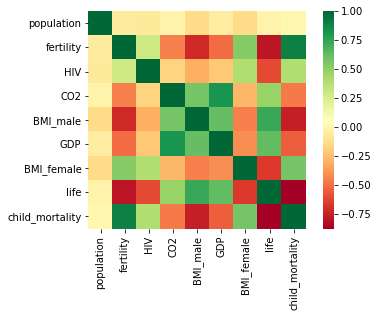

In [7]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

The above diagram is a heatmap showing the correlation  between the different features in the gapminder dataset. Cells in green show positive correlation, while cells that are in red show negative correlation. From the plot we observe a strong negative relationship between Life expectancy and Fertility and a fairly positive relationship between Male BMI and Life Expectancy. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [9]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


### LINEAR REGRESSION

Regression mechanics is given as 𝑦 = m𝑥+𝑏, where;
* y = target/dependent variable
* X = single/independent variable
* m,b = parameters of the model

In [10]:
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

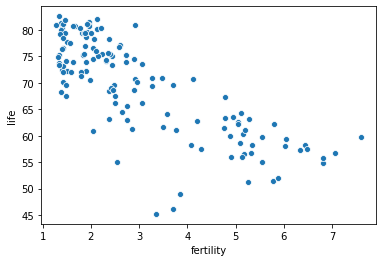

In [13]:
sns.scatterplot( x='fertility', y='life', data=df)

The scatterplot of life expectancy and fertility shows us a strongly negative correlation as given by the heatmap.

###  FIT AND PREDICT 

0.6192442167740035


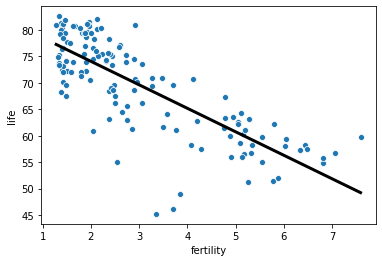

In [14]:
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create th prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_fertility, y)

# compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print $R^2$
print(reg.score(X_fertility, y))

# Plot regression line on scatter plot
sns.scatterplot(x='fertility', y='life', data=df)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

### TRAIN/TEST SPLIT FOR REGRESSION

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


### CROSS VALIDATION

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data. Cross  validation helps to solve the problem of your metric being totally dependent on your train/test split by cross validating datasets. Common cross validations include  5 or 10 fold cross validations and also the k-fold cross validation. However, the more the folds you use, the more computationally expensive cross-validation becomes.

### 5 FOLD CROSS VALIDATION

In [16]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### 10 FOLD CROSS VALIDATION

In [17]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.54471791 0.75586083 0.83921958 0.6900756  0.33991801 0.53042913
 0.44784016 0.66619475 0.4439451  0.62573667]
Average 5-Fold CV Score: 0.5883937741571185


### COMPUTATION TIME FOR 3, 5, 10 FOLD CROSS VALIDATION
This can be gotten using;

%timeit cross_val_score(reg, X, y, cv = ____)

In [18]:
# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit cross_val_score(reg, X, y, cv=3)
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 5-fold CV
%timeit cross_val_score(reg, X, y, cv=5)
cvscores_5 = cross_val_score(reg, X, y, cv=5)
print(np.mean(cvscores_5))

# Perform 10-fold CV
%timeit cross_val_score(reg, X, y, cv=10)
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

5.58 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.6294715754653507
7.38 ms ± 360 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.6168819644425119
15 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.5883937741571185


### REGULARIZED REGRESSION 
Linear regressions minimizes the cost/loss function by choosing a coeffiecient for each feature variable while trying to minimize distance between the data points and the line of best fit, R^2.
However, regularization is still needed as we can encounter common problems of overfitting and underfitting. Regularized regression helps reduce this by penalizing larger coefficients. A new function called alpha is introduced and helps counter this problem and also control model complexity.

We have two types of Regularized regression namely; Ridge regression and Lasso regression. It is important to also note that higher alpha values may also lead to underfitting

### RIDGE REGRESSION
Ridge is the first choice in building regression models. 

In [19]:
#importing module
from sklearn.linear_model import Ridge

#Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Giving alpha a value
ridge = Ridge(alpha = 0.1, normalize=True)

#Fitting
ridge.fit(X_train, y_train)

#Prediction
ridge.predict(X_test)

#Score
ridge.score(X_test, y_test)

0.7400155738397822

### LASSO REGRESSION
Lasso is great for feature selection.It selects the most important feature for prediction, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In [20]:
X = df.drop('life', axis='columns').values
y = df['life'].values

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


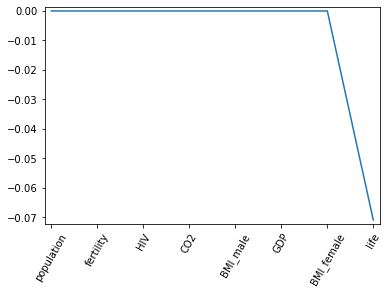

In [21]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
df_columns = df.columns[:-1]
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)

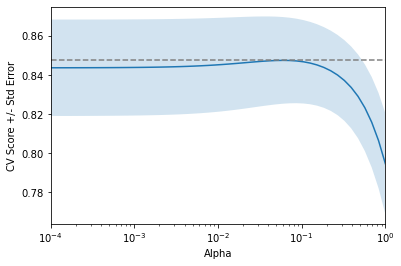

In [24]:
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge.alhpa
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std)